# Cleaning up the NBA Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 
%matplotlib inline

In [2]:
# Stats columns used in the weekly matchups in a NBA fantasy league
stats = ['PTS', 'MP', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'AST', 'STL', 'TOV', 'BLK', 'PF']

In [3]:
# Read per game data of NBA players from 1947 to present
df = pd.read_csv('D:/nba_fantasy_projector/stats-csv/nba-per-game-stats.csv', header = 0)

In [4]:
# Renaming and simplifying columns
df.rename(columns={'mp_per_game': 'MP',
                   'fg_per_game': 'FGM',
                   'fga_per_game': 'FGA',
                   'x3p_per_game': 'FG3M',
                   'x3pa_per_game': 'FG3A',
                   'ft_per_game': 'FTM',
                   'fta_per_game': 'FTA',
                   'orb_per_game': 'OREB',
                   'drb_per_game': 'DREB',
                   'ast_per_game': 'AST',
                   'stl_per_game': 'STL',
                   'blk_per_game': 'BLK',
                   'tov_per_game': 'TOV',
                   'pf_per_game': 'PF',
                   'pts_per_game': 'PTS'}, inplace=True)

# Remove unused columns
df = df.drop(['seas_id','trb_per_game', 'x2pa_per_game', 'x2p_per_game'], axis=1)

In [5]:
# Drop rows where all values are NaN
cleaned_df = df.dropna(axis=0, how='all')

# Drop rows that have NaN in stat columns in the 'stats' list
cleaned_df = cleaned_df.dropna(subset=stats)

<Axes: >

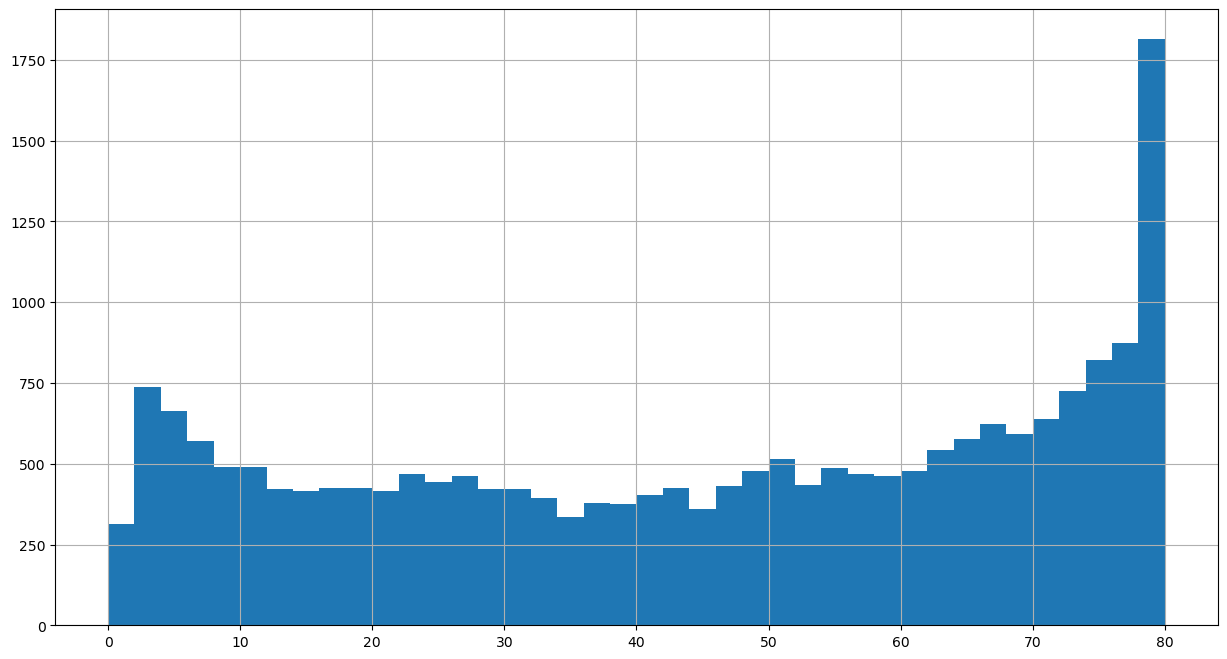

In [6]:
# Removing outliers in the data
# Histogram of games played in the dataframe
bin_vals = np.arange(start = 0, stop=82, step=2)
cleaned_df['g'].hist(bins=bin_vals, figsize=[15, 8])

In [7]:
# Observing the histogram, we can see the data set gets more normal after 10 games
# All seasons for players that played in less than 10 games will be removed from the dataframe
min_games = 10
filtered_df = cleaned_df[cleaned_df['g'] > min_games]

In [8]:
a = cleaned_df['player_id'].count()
b = filtered_df['player_id'].count()

In [9]:
a - b
# 3021 rows have been removed

3021

# Normalising Data Across NBA Seasons
A 20 points per game player in 1995 is not equivalent to a 20 points per game player in 2023. The playstyle, pace and rules of the NBA have drastically changed over the years. More specifically, the pace of the game has increased, with the average points per game of each season increasing consistently alongside the league's evolution. A key contributor to this is the increased volume in three point shooting, which allows a modern NBA player to more easily average 20 points per game compared to a NBA player from the past. Normalising the stats across NBA seasons will allow for better comparison between players' seasons across multiple decades.

In [10]:
latest_season = (filtered_df['season'] == 2023)

In [11]:
df_2023 = filtered_df[latest_season]

In [12]:
# Function to normalise each stat column
def normalise(column):
    return (column - column.min()) / (column.max() - column.min())

In [13]:
stats_to_norm = ['PTS', 'MP', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'AST', 'STL', 'TOV', 'BLK', 'PF']

In [14]:
# Function to normalise the dataframe using the function above
def normalise_df(df):
    for stat in stats_to_norm:
        df['NORM_{}'.format(stat)] = normalise(df[stat])
    return df

In [15]:
normed_2023 = normalise_df(df_2023)

In [16]:
normed_2023.sample(5)

,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,...,NORM_FG3A,NORM_FTM,NORM_FTA,NORM_OREB,NORM_DREB,NORM_AST,NORM_STL,NORM_TOV,NORM_BLK,NORM_PF
126,2023,4927,Day'Ron Sharpe,NaN,C,21.0,2,NBA,BRK,48,...,0.017544,0.07,0.089431,0.411765,0.202128,0.066038,0.111111,0.200,0.233333,0.486486
118,2023,4708,Darius Garland,NaN,PG,23.0,4,NBA,CLE,69,...,0.526316,0.40,0.382114,0.078431,0.223404,0.726415,0.611111,0.700,0.033333,0.540541
217,2023,4620,Grayson Allen,NaN,SG,27.0,5,NBA,MIL,72,...,0.447368,0.16,0.146341,0.156863,0.234043,0.207547,0.444444,0.225,0.066667,0.405405
298,2023,5064,Jeremy Sochan,NaN,PF,19.0,1,NBA,SAS,56,...,0.210526,0.14,0.170732,0.333333,0.361702,0.226415,0.388889,0.400,0.133333,0.648649
155,2023,4400,Domantas Sabonis,NaN,C,26.0,7,NBA,SAC,79,...,0.096491,0.41,0.447154,0.627451,0.946809,0.679245,0.388889,0.700,0.166667,0.918919


Now we have the columns of normalised stats to compare players across a season. However, since the dataframe is comprised of multiple seasons, we will have to groupby season. 

In [17]:
new_df = filtered_df.groupby(['season']).apply(normalise_df)

In [18]:
new_df.sample(5)

,,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,...,NORM_FG3A,NORM_FTM,NORM_FTA,NORM_OREB,NORM_DREB,NORM_AST,NORM_STL,NORM_TOV,NORM_BLK,NORM_PF
season,,,,,,,,,,,,,,,,,,,,,,
2023,436,2023,4426,Malik Beasley,NaN,SG,26.0,7,NBA,LAL,26,...,0.631579,0.050000,0.065041,0.058824,0.297872,0.103774,0.388889,0.275000,0.000000,0.297297
1987,20476,1987,2263,Nick Vanos,NaN,C,23.0,2,NBA,PHO,57,...,0.000000,0.068627,0.076271,0.210526,0.184783,0.057851,0.093750,0.133333,0.097561,0.341463
2021,1964,2021,4764,Mfiondu Kabengele,NaN,PF,23.0,2,NBA,TOT,39,...,0.102362,0.043478,0.046729,0.063830,0.110000,0.034188,0.095238,0.083333,0.088235,0.216216
1995,17024,1995,2629,Trevor Wilson,NaN,PF,26.0,3,NBA,SAC,15,...,0.000000,0.086420,0.083333,0.125000,0.090090,0.065041,0.103448,0.054054,0.025641,0.153846
1988,19889,1988,2237,Dirk Minniefield,NaN,PG,27.0,3,NBA,BOS,61,...,0.043478,0.044944,0.033898,0.058824,0.089888,0.224638,0.218750,0.307692,0.000000,0.394737


Now we have normalised the data across each stat column across every player in every season.

# Function to calculate the distance between two players
The player distance function calculates how close two players are on any given stat.

In [19]:
# Function uses the euclidean distance formula, finding the shortest path between the two points
def calc_distance(a, b):
    dist = np.sqrt(np.sum(a - b)**2)
    return dist

In [20]:
# Testing this function with three players from the dataframe
tatum_df = df_2023[df_2023['player'] == 'Jayson Tatum']
ayton_df = df_2023[df_2023['player'] == 'Deandre Ayton']
doncic_df = df_2023[df_2023['player'] == 'Luka Dončić']

In [21]:
tatum_ppg = tatum_df.PTS.tolist()[0]
ayton_ppg = ayton_df.PTS.tolist()[0]
doncic_ppg = doncic_df.PTS.tolist()[0]

In [22]:
# Run the calc_distance function for each pairing
calc_distance(tatum_ppg, ayton_ppg)

12.100000000000001

In [23]:
calc_distance(tatum_ppg, doncic_ppg)

2.299999999999997

In [24]:
calc_distance(ayton_ppg, doncic_ppg)

14.399999999999999

Hence, the model will group Tatum closer to Doncic for ppg and further from Ayton for ppg.

# Function to Find A Player
Find a row of data based on a player's id and season.

In [25]:
def find_player(df, player_id, season):
    for row in df.itertuples():
        if player_id == row.player_id and season == row.season:
            return row

In [26]:
# Testing with DeMar DeRozan's 2017 season
find_player(df, 3872, 2017)

Pandas(Index=4358, season=2017, player_id=3872, player='DeMar DeRozan', birth_year=nan, pos='SG', age=27.0, experience=8, lg='NBA', tm='TOR', g=74, gs=74.0, MP=35.4, FGM=9.7, FGA=20.9, fg_percent=0.467, FG3M=0.4, FG3A=1.7, x3p_percent=0.266, x2p_percent=0.484, e_fg_percent=0.477, FTM=7.4, FTA=8.7, ft_percent=0.842, OREB=0.9, DREB=4.3, AST=3.9, STL=1.1, BLK=0.2, TOV=2.4, PF=1.8, PTS=27.3)

# Calculating Similarity of Players
Using the calc_distance function, a single player's normalised stats will be compared with every other player's normalised stats to find the 20 most similar player seasons. This process will then be repeated for each player.

In [27]:
# Firstly, completing this process with a single random player

In [28]:
# Grant Williams
current_player_id = 4720
current_season = 2023

In [29]:
# Calculate all of Grant William's normalised stats
# Using the normalised df that has been groupedby season
current_player_stats = np.array([
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_PTS']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_MP']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FGM']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FGA']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FG3M']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FG3A']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FTM']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FTA']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_OREB']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_DREB']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_AST']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_STL']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_TOV']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_BLK']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_PF']).item()
])

In [30]:
print(current_player_stats)

[0.23780488 0.65642458 0.23423423 0.25345622 0.30612245 0.3245614
 0.12       0.12195122 0.21568627 0.35106383 0.1509434  0.22222222
 0.225      0.13333333 0.62162162]


In [31]:
# Now comparing with another player, Russell Westbrook 2016
westbrook_player_id = 3849
westbrook_mvp_season = 2016

In [32]:
westbrook_player_stats = np.array([
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_PTS']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_MP']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FGM']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FGA']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FG3M']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FG3A']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FTM']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FTA']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_OREB']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_DREB']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_AST']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_STL']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_TOV']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_BLK']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_PF']).item()
])

In [33]:
# Using the calc_distance function to compare the two players for each normalised stat
# vectorize the function to operate on a set of values instead of a single value at a time
vectorized_func = np.vectorize(calc_distance)

In [34]:
distance_vector = vectorized_func(current_player_stats, westbrook_player_stats)

In [35]:
distance_vector

array([0.53922215, 0.236639  , 0.56576577, 0.62654378, 0.05122049,
       0.05936717, 0.53909091, 0.58393113, 0.15166066, 0.21893617,
       0.73794549, 0.73015873, 0.70978261, 0.05225225, 0.06409266])

In [36]:
# Now dividing the sum total of the absolute difference with the number of columns to find the average difference
difference = np.sum(np.abs(distance_vector) / len(distance_vector))

In [37]:
difference

0.39110726515536737

This indicates that Williams' and Westbrook's seasons weren't statistically similar. Which makes sense considering the large difference in each players' skillsets, roles within their team and statistical averages.

# Using a For Loop to Compare Multiple Players
Using the logic in the section above, we will compare Grant Williams' 2023 season with a random sample of 5 players' seasons in the dataframe.

In [38]:
distance_list = []
sample_df = new_df.sample(5)

In [39]:
# For each row, create a vector for all normalised stats for the target player, the player being compared to Grant Williams
for row in sample_df.itertuples():
    target_player_stats = np.array([
        row.NORM_PTS,
        row.NORM_MP,
        row.NORM_FGM,
        row.NORM_FGA,
        row.NORM_FG3M,
        row.NORM_FG3A,
        row.NORM_FTM,
        row.NORM_FTA,
        row.NORM_OREB,
        row.NORM_DREB,
        row.NORM_AST,
        row.NORM_STL,
        row.NORM_TOV,
        row.NORM_BLK,
        row.NORM_PF
    ])
    
    # Vectorize the calc_distance function and run it to compare Grant Williams with the target player
    vectorized_func = np.vectorize(calc_distance)
    distance_vector = vectorized_func(current_player_stats, target_player_stats)

    # Calculate the difference and append it to the distance list
    difference = np.sum(np.abs(distance_vector) / len(distance_vector))
    distance_list.append(difference)
    compared_player = row.player
    
    print('Compared to ' + compared_player + '. difference: ' + str(difference))

Compared to Charles Jones. difference: 0.11538433303375166
Compared to Chris Morris. difference: 0.14823862063871912
Compared to D.J. Wilson. difference: 0.1812780249549689
Compared to Nate Robinson. difference: 0.08550345410565988
Compared to Vincent Askew. difference: 0.14246846520169404


In [40]:
# Adding distance as a new column in the sample_df
sample_df['distance'] = distance_list

In [41]:
# Sort the dataframe by shortest distance to furthest
sorted_df = sample_df.sort_values('distance')
sorted_df

,,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,...,NORM_FTM,NORM_FTA,NORM_OREB,NORM_DREB,NORM_AST,NORM_STL,NORM_TOV,NORM_BLK,NORM_PF,distance
season,,,,,,,,,,,,,,,,,,,,,,
2007,10525,2007,3628,Nate Robinson,NaN,PG,22.0,2,NBA,NYK,64,...,0.156863,0.182609,0.204545,0.118812,0.120690,0.363636,0.232558,0.030303,0.647059,0.085503
1985,20999,1985,2163,Charles Jones,1962.0,C,23.0,1,NBA,PHO,78,...,0.239130,0.309735,0.320755,0.367816,0.115108,0.200000,0.347826,0.142857,0.375000,0.115384
1993,17962,1993,2399,Vincent Askew,NaN,SG,26.0,4,NBA,TOT,73,...,0.175676,0.180000,0.120690,0.099174,0.141667,0.178571,0.200000,0.071429,0.317073,0.142468
1989,19397,1989,2413,Chris Morris,NaN,SF,23.0,1,NBA,NJN,76,...,0.272727,0.280702,0.490196,0.282609,0.111111,0.406250,0.600000,0.186047,0.763158,0.148239
2020,2303,2020,4482,D.J. Wilson,NaN,PF,23.0,3,NBA,MIL,37,...,0.029412,0.042373,0.065217,0.171171,0.059406,0.047619,0.085106,0.034483,0.135135,0.181278


The shorter the distance, the more similar any two players' seasons are. Therefore, Danny Granger's 1994 season is the most statistically similar season compared to Grant Williams' 2023 season in the small sample.

# Logic for the next steps of the model...
For each current player partaking in the 2023-24 season, we will be finding the 20 most similar player seasons across history. Once we have the 20 most similar seasons, we will look at the following season (the season after) for each of them. The logic is that we can use a weighted average of the following season stats for those 20 seasons to predict the current player's upcoming stats.

A weighted average will be used to allow for similar seasons with the shortest difference to be more emphasised.

In [42]:
seasons = [str(year) for year in range(1947, 2024)]
predicted_stats = {}

In [43]:
sorted_df.distance

season       
2007    10525    0.085503
1985    20999    0.115384
1993    17962    0.142468
1989    19397    0.148239
2020    2303     0.181278
Name: distance, dtype: float64

In [44]:
sorted_df

,,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,...,NORM_FTM,NORM_FTA,NORM_OREB,NORM_DREB,NORM_AST,NORM_STL,NORM_TOV,NORM_BLK,NORM_PF,distance
season,,,,,,,,,,,,,,,,,,,,,,
2007,10525,2007,3628,Nate Robinson,NaN,PG,22.0,2,NBA,NYK,64,...,0.156863,0.182609,0.204545,0.118812,0.120690,0.363636,0.232558,0.030303,0.647059,0.085503
1985,20999,1985,2163,Charles Jones,1962.0,C,23.0,1,NBA,PHO,78,...,0.239130,0.309735,0.320755,0.367816,0.115108,0.200000,0.347826,0.142857,0.375000,0.115384
1993,17962,1993,2399,Vincent Askew,NaN,SG,26.0,4,NBA,TOT,73,...,0.175676,0.180000,0.120690,0.099174,0.141667,0.178571,0.200000,0.071429,0.317073,0.142468
1989,19397,1989,2413,Chris Morris,NaN,SF,23.0,1,NBA,NJN,76,...,0.272727,0.280702,0.490196,0.282609,0.111111,0.406250,0.600000,0.186047,0.763158,0.148239
2020,2303,2020,4482,D.J. Wilson,NaN,PF,23.0,3,NBA,MIL,37,...,0.029412,0.042373,0.065217,0.171171,0.059406,0.047619,0.085106,0.034483,0.135135,0.181278


# Bringing it all together...
Predicting the stats for all players coming into the 2023-24 season.

In [45]:
def stats_prediction(df, current_season, current_player_id):
    if not ((df['season'] == current_season) & (df['player_id'] == current_player_id)).any():
        print('Cannot find player in season {} with player_id {}'.format(current_season, current_player_id))
        return

    distance_list = []
    
    # These values can be adjusted to suit the point system being used in the Fantasy League you are playing in
    # default settings are a weight of 1.0 for each stat
    fantasy_points_weighting = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

    # Calculate all of current player's normalised stats, using the normalised dataframe that has been grouped by season
    current_player_stats = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season'] == current_season), 'NORM_PTS']).values[0],
        (df.loc[(df['player_id'] == current_player_id) & (df['season'] == current_season), 'NORM_MP']).values[0],
        (df.loc[(df['player_id'] == current_player_id) & (df['season'] == current_season), 'NORM_FGM']).values[0],
        (df.loc[(df['player_id'] == current_player_id) & (df['season'] == current_season), 'NORM_FGA']).values[0],
        (df.loc[(df['player_id'] == current_player_id) & (df['season'] == current_season), 'NORM_FG3M']).values[0],
        (df.loc[(df['player_id'] == current_player_id) & (df['season'] == current_season), 'NORM_FG3A']).values[0],
        (df.loc[(df['player_id'] == current_player_id) & (df['season'] == current_season), 'NORM_FTM']).values[0],
        (df.loc[(df['player_id'] == current_player_id) & (df['season'] == current_season), 'NORM_FTA']).values[0],
        (df.loc[(df['player_id'] == current_player_id) & (df['season'] == current_season), 'NORM_OREB']).values[0],
        (df.loc[(df['player_id'] == current_player_id) & (df['season'] == current_season), 'NORM_DREB']).values[0],
        (df.loc[(df['player_id'] == current_player_id) & (df['season'] == current_season), 'NORM_AST']).values[0],
        (df.loc[(df['player_id'] == current_player_id) & (df['season'] == current_season), 'NORM_STL']).values[0],
        (df.loc[(df['player_id'] == current_player_id) & (df['season'] == current_season), 'NORM_TOV']).values[0],
        (df.loc[(df['player_id'] == current_player_id) & (df['season'] == current_season), 'NORM_BLK']).values[0],
        (df.loc[(df['player_id'] == current_player_id) & (df['season'] == current_season), 'NORM_PF']).values[0]
    ])
    
    # For each row, create a vector for all normalised stats for the target player
    for row in df.itertuples():
        target_player_stats = np.array([
            row.NORM_PTS,
            row.NORM_MP,
            row.NORM_FGM,
            row.NORM_FGA,
            row.NORM_FG3M,
            row.NORM_FG3A,
            row.NORM_FTM,
            row.NORM_FTA,
            row.NORM_OREB,
            row.NORM_DREB,
            row.NORM_AST,
            row.NORM_STL,
            row.NORM_TOV,
            row.NORM_BLK,
            row.NORM_PF
        ])
        

        vectorized_func = np.vectorize(calc_distance)
        distance_vector = vectorized_func(current_player_stats, target_player_stats)
        
        # Apply the weighting settings
        weighted_dist = distance_vector * fantasy_points_weighting
        difference = np.sum(np.abs(weighted_dist)) / len(distance_vector)

        # Calculate the difference and append it to the distance list
        distance_list.append(difference)
    
    df['distance'] = distance_list
    
    # Dataframe sorted by shortest distance
    sorted_df = df.sort_values('distance')

    # Extract current player's name
    current_player_name = df.loc[(df['season'] == current_season) & (df['player_id'] == current_player_id), 'player'].iloc[0]

    predicted_stats = {}
    print('Predicting 2023-24 stats for player: {} (player id: {}) '.format(current_player_name, current_player_id))
    
    for col in stats:
        stat_sum = 0
        weight_sum = 0

        # Compare the target player with the top 20 most similar player seasons in history
        for idx, row in sorted_df.iloc[0:21].iterrows():
            if col == 'PTS':
                print('Comparing with {} in {}' .format(row.player, row.season))
            # Can't take the following season, skip it
            if row.season == 2023:
                continue

            # Player season is being compared with itself, skip it
            if row.distance == 0:
                continue

            weight = (1 / row.distance)
            following_season = row.season + 1

            # Use the find player function to find the stats for the following season
            following_season_stats = find_player(sorted_df, row.player_id, following_season)

            # Specific player never played in the following season (i.e. retired, injured, etc)
            if following_season_stats == None:
                continue
            
            stat_sum += getattr(following_season_stats, col) * weight
            weight_sum += weight
            
        if weight_sum != 0:
            # Using player_id as an identifier in the predicted stats dictionary
            predicted_stats['player_id'] = current_player_id

            # Using the season being predicted as an identifier
            predicted_stats['predicted_season'] = following_season

            # Calculate the predicted value for each stat column
            predicted_stats['predicted_' + col] = (stat_sum / weight_sum)
    
    return predicted_stats

# Predicting 2023-24 NBA Season Stats
A quick test run with 5 randomly selected players...

In [46]:
norm_df = normalise_df(filtered_df)
df_2023 = norm_df[norm_df['season'] == 2023]
small_test_df = df_2023.sample(5)
small_test_df = normalise_df(small_test_df)
small_test_df

,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,...,NORM_FG3A,NORM_FTM,NORM_FTA,NORM_OREB,NORM_DREB,NORM_AST,NORM_STL,NORM_TOV,NORM_BLK,NORM_PF
77,2023,4919,Chris Duarte,NaN,SF,25.0,2,NBA,IND,46,...,1.000000,0.800000,0.6875,0.000000,0.55,1.000000,0.8,1.000000,0.4,0.538462
295,2023,3761,Jeff Green,NaN,PF,36.0,15,NBA,DEN,56,...,0.095238,1.000000,1.0000,1.000000,0.45,0.846154,0.4,0.857143,0.6,0.846154
559,2023,3713,Rudy Gay,NaN,PF,36.0,17,NBA,UTA,56,...,0.285714,0.466667,0.2500,0.666667,0.65,0.692308,0.4,0.714286,0.6,0.384615
1,2023,5026,A.J. Lawson,NaN,SG,22.0,1,NBA,TOT,15,...,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000000
130,2023,4710,Dean Wade,NaN,PF,26.0,4,NBA,CLE,44,...,0.571429,0.133333,0.0000,0.333333,1.00,0.538462,1.0,0.285714,1.0,1.000000


In [47]:
player_ids_2023 = small_test_df['player_id'].tolist()
player_ids_2023

[4919, 3761, 3713, 5026, 4710]

In [48]:
predictions_data = []
for player in player_ids_2023:
    # generate stats predictions for each player
    prediction = stats_prediction(filtered_df, 2023, player)
    if (prediction == None):
        continue
    predictions_data.append(prediction)

Predicting 2023-24 stats for player: Chris Duarte (player id: 4919) 
Comparing with Chris Duarte in 2023
Comparing with Devin Brown in 2010
Comparing with Marco Belinelli in 2015
Comparing with R.J. Hampton in 2023
Comparing with Brent Barry in 2005
Comparing with Tre Mann in 2023
Comparing with Bobby Jackson in 2008
Comparing with Jeff Green in 2020
Comparing with Grayson Allen in 2020
Comparing with Cedi Osman in 2023
Comparing with Luke Kennard in 2018
Comparing with Jerry Stackhouse in 2010
Comparing with Malachi Flynn in 2021
Comparing with Damion Lee in 2023
Comparing with P.J. Hairston in 2016
Comparing with Chandler Parsons in 2018
Comparing with Jeff Green in 2020
Comparing with Sasha Vujačić in 2008
Comparing with Furkan Korkmaz in 2022
Comparing with Jaylen Nowell in 2021
Comparing with Ben McLemore in 2017
Predicting 2023-24 stats for player: Jeff Green (player id: 3761) 
Comparing with Jeff Green in 2023
Comparing with Chris Mills in 2002
Comparing with Kirk Snyder in 2006

In [49]:
predictions_data

[{'player_id': 4919,
  'predicted_season': 2018,
  'predicted_PTS': 7.998918788359586,
  'predicted_MP': 19.997646888916453,
  'predicted_FGM': 2.8344837856243124,
  'predicted_FGA': 6.663588457911938,
  'predicted_FG3M': 1.1939633493922859,
  'predicted_FG3A': 3.291957109257763,
  'predicted_FTM': 1.1130175632706667,
  'predicted_FTA': 1.3921738510347397,
  'predicted_OREB': 0.3460404903368858,
  'predicted_DREB': 2.1347874220551435,
  'predicted_AST': 1.641970158171826,
  'predicted_STL': 0.6083247040947091,
  'predicted_TOV': 0.8239555940597397,
  'predicted_BLK': 0.20721537377243443,
  'predicted_PF': 1.484962696843445},
 {'player_id': 3761,
  'predicted_season': 2020,
  'predicted_PTS': 7.8637964292250615,
  'predicted_MP': 19.55583452835574,
  'predicted_FGM': 2.857640615016905,
  'predicted_FGA': 6.588477974062147,
  'predicted_FG3M': 0.7730917762797128,
  'predicted_FG3A': 2.0993573871237583,
  'predicted_FTM': 1.4015560294291294,
  'predicted_FTA': 1.8420129246534733,
  'predi

# Predicting 2023-24 NBA Season Stats
Predicting the stats for each player for the upcoming 2023-24 season.

In [50]:
norm_df = normalise_df(filtered_df)
df_2023 = norm_df[norm_df['season'] == 2023]
final_df = df_2023.drop_duplicates(subset='player_id')
player_ids_2023 = final_df['player_id'].tolist()

all_player_predictions = []

for player in player_ids_2023:
    # generate stats predictions for each player
    prediction = stats_prediction(filtered_df, 2023, player)
    if (prediction == None):
        continue
    all_player_predictions.append(prediction)

Predicting 2023-24 stats for player: A.J. Green (player id: 5025) 
Comparing with A.J. Green in 2023
Comparing with Matt Thomas in 2020
Comparing with Dāvis Bertāns in 2023
Comparing with Troy Daniels in 2020
Comparing with Matt Ryan in 2023
Comparing with Travis Diener in 2006
Comparing with Anthony Roberson in 2009
Comparing with Troy Daniels in 2016
Comparing with Troy Daniels in 2020
Comparing with Anthony Roberson in 2009
Comparing with J.J. Redick in 2021
Comparing with Ryan Broekhoff in 2020
Comparing with Troy Daniels in 2015
Comparing with Paul Watson in 2021
Comparing with Donyell Marshall in 2009
Comparing with Steve Novak in 2014
Comparing with Isaiah Joe in 2021
Comparing with Mychal Mulder in 2021
Comparing with James Jones in 2015
Comparing with Anthony Tolliver in 2015
Comparing with Patrick Baldwin Jr. in 2023
Predicting 2023-24 stats for player: A.J. Lawson (player id: 5026) 
Comparing with A.J. Lawson in 2023
Comparing with A.J. Lawson in 2023
Comparing with Kevin Kn

In [51]:
all_player_predictions

[{'player_id': 5025,
  'predicted_season': 2016,
  'predicted_PTS': 4.469288024763253,
  'predicted_MP': 11.497105865233195,
  'predicted_FGM': 1.5494493278309125,
  'predicted_FGA': 3.91940353725351,
  'predicted_FG3M': 1.0355494792214441,
  'predicted_FG3A': 2.790842479075519,
  'predicted_FTM': 0.3376725425538797,
  'predicted_FTA': 0.45913064868907855,
  'predicted_OREB': 0.18908609282372632,
  'predicted_DREB': 1.1307538833508413,
  'predicted_AST': 0.5919243584500027,
  'predicted_STL': 0.2157608405850809,
  'predicted_TOV': 0.42970777505133934,
  'predicted_BLK': 0.08099924248943642,
  'predicted_PF': 0.8778583264048405},
 {'player_id': 5026,
  'predicted_season': 2022,
  'predicted_PTS': 4.640836169843098,
  'predicted_MP': 12.821922338655948,
  'predicted_FGM': 1.6724813555615012,
  'predicted_FGA': 3.9585950910205407,
  'predicted_FG3M': 0.9033528811090404,
  'predicted_FG3A': 2.3813572840878536,
  'predicted_FTM': 0.4002458299047887,
  'predicted_FTA': 0.5564866605094695,
  

# Configuring default fantasy point system
ESPN's default system

Point = 1

3PM = 1

FGA = -1

FGM = 2

FTA = -1

FTM = 1

REB = 1

AST = 2

STL = 4

BLK = 4

TOV = -2

The points associated with each stat can be adjusted depending on the scoring system used in your fantasy league.

In [52]:
scoring_system = {
    'PTS': 1,
    'FGM': 2,
    'FGA': -1,
    'FTM': 1,
    'FTA': -1,
    'FG3M': 1,
    'OREB': 1,
    'DREB': 1,
    'AST': 2,
    'STL': 4,
    'BLK': 4,
    'TOV': -2
}

In [53]:
def calculate_fantasy_score(player):
    fantasy_points = (
        player['predicted_PTS'] * scoring_system['PTS'] +
        player['predicted_FGM'] * scoring_system['FGM'] +
        player['predicted_FGA'] * scoring_system['FGA'] +
        player['predicted_FTM'] * scoring_system['FTM'] +
        player['predicted_FTA'] * scoring_system['FTA'] +
        player['predicted_FG3M'] * scoring_system['FG3M'] +
        player['predicted_OREB'] * scoring_system['OREB'] +
        player['predicted_DREB'] * scoring_system['DREB'] +
        player['predicted_AST'] * scoring_system['AST'] +
        player['predicted_STL'] * scoring_system['STL'] +
        player['predicted_BLK'] * scoring_system['BLK'] +
        player['predicted_TOV'] * scoring_system['TOV']
    )
    
    return fantasy_points

In [54]:
norm_df = normalise_df(filtered_df)
df_2023 = norm_df[norm_df['season'] == 2023]
final_df = df_2023.drop_duplicates(subset='player_id')
player_ids_2023 = final_df['player_id'].tolist()

# Calculate projected fantasy points for each player and insert into the final df
for player in all_player_predictions:
    if not player:
        continue
    idx = final_df[final_df['player_id'] == player['player_id']].index
    predicted_fantasy_points = calculate_fantasy_score(player)

    # Calculating average and total projected fantasy points for each player's season, assuming all players will play 70 games
    final_df.loc[idx, 'AVG'] = predicted_fantasy_points
    final_df.loc[idx, 'FPTS'] = predicted_fantasy_points * 70


# Sorting the final df by total projected fantasy points
final_df = final_df.sort_values(by='FPTS', ascending=False)

In [55]:
# Remove columns that aren't neccesary for to export to reduce clutter
stats.append('AVG')
stats.append('FPTS')
stats.append('player')
final_df = final_df.loc[:, stats]
final_df = final_df[ ['player'] + [ col for col in final_df.columns if col != 'player' ]]

In [56]:
# Exporting to a csv file
final_df.to_csv('D:/nba_fantasy_projector/nba_fantasy_projections_2023-24.csv', index=False)

In [57]:
final_df

,player,PTS,MP,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,AST,STL,TOV,BLK,PF,AVG,FPTS
506,Nikola Jokić,24.5,33.7,9.4,14.8,0.8,2.2,4.9,6.0,2.4,9.4,9.8,1.3,3.6,0.7,2.5,51.687172,3618.102032
306,Joel Embiid,33.1,34.6,11.0,20.1,1.0,3.0,10.0,11.7,1.7,8.4,4.2,1.0,3.4,1.7,3.1,50.604582,3542.320762
415,LeBron James,28.9,35.5,11.1,22.2,2.2,6.9,4.6,5.9,1.2,7.1,6.8,0.9,3.2,0.6,1.6,50.156111,3510.927771
422,Luka Dončić,32.4,36.2,10.9,22.0,2.8,8.2,7.8,10.5,0.8,7.8,8.0,1.4,3.6,0.5,2.5,49.772607,3484.082487
207,Giannis Antetokounmpo,31.1,32.1,11.2,20.3,0.7,2.7,7.9,12.3,2.2,9.6,5.7,0.8,3.9,0.8,3.1,49.527484,3466.923855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,Josh Minott,3.1,6.4,1.2,2.4,0.1,0.4,0.5,0.5,0.3,1.3,0.3,0.3,0.2,0.4,0.7,6.719277,470.349410
408,KZ Okpala,1.3,7.1,0.5,1.1,0.2,0.6,0.2,0.2,0.2,0.8,0.4,0.2,0.2,0.2,1.1,6.566252,459.637627
509,Noah Vonleh,1.1,7.4,0.5,1.0,0.0,0.2,0.1,0.1,0.8,1.3,0.3,0.1,0.5,0.3,1.5,6.201479,434.103511
656,Vince Williams Jr.,2.0,7.0,0.8,2.7,0.3,1.9,0.1,0.1,0.3,0.7,0.3,0.4,0.3,0.1,0.8,5.832134,408.249377
